In [25]:
import numpy
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [26]:
all_df = pd.read_excel("car.xlsx")

In [27]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [28]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [29]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [30]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [31]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [32]:
Y = all_df['class'].values.astype('int64')

In [33]:
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaledFeatures=minmax_scale.fit_transform(X)   
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1382

In [34]:
from keras.utils import np_utils
train_Label=np_utils.to_categorical(train_Label)
test_Label=np_utils.to_categorical(test_Label)

In [35]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [36]:
model = Sequential()

In [37]:
model.add(Dense(units=18*3,input_dim=6,
                kernel_initializer='uniform', 
                activation='relu'))

In [38]:
model.add(Dense(units=18*2, 
                kernel_initializer='uniform', 
                activation='relu'))

In [39]:
model.add(Dense(units=18, 
                kernel_initializer='uniform', 
                activation='relu'))

In [40]:
model.add(Dense(units=4, 
                kernel_initializer='uniform',
                activation='softmax'))

In [41]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 54)                378       
_________________________________________________________________
dense_6 (Dense)              (None, 36)                1980      
_________________________________________________________________
dense_7 (Dense)              (None, 18)                666       
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 76        
Total params: 3,100
Trainable params: 3,100
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [43]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=35,verbose=2)

Train on 1243 samples, validate on 139 samples
Epoch 1/30
 - 1s - loss: 1.3424 - acc: 0.6758 - val_loss: 1.2162 - val_acc: 0.6619
Epoch 2/30
 - 0s - loss: 1.0433 - acc: 0.6903 - val_loss: 0.9787 - val_acc: 0.6619
Epoch 3/30
 - 0s - loss: 0.9486 - acc: 0.6903 - val_loss: 0.9469 - val_acc: 0.6619
Epoch 4/30
 - 0s - loss: 0.9135 - acc: 0.6903 - val_loss: 0.9127 - val_acc: 0.6619
Epoch 5/30
 - 0s - loss: 0.8658 - acc: 0.6903 - val_loss: 0.8679 - val_acc: 0.6619
Epoch 6/30
 - 0s - loss: 0.7968 - acc: 0.6903 - val_loss: 0.8016 - val_acc: 0.6619
Epoch 7/30
 - 0s - loss: 0.7134 - acc: 0.6903 - val_loss: 0.7278 - val_acc: 0.6619
Epoch 8/30
 - 0s - loss: 0.6373 - acc: 0.6903 - val_loss: 0.6591 - val_acc: 0.6619
Epoch 9/30
 - 0s - loss: 0.5694 - acc: 0.6903 - val_loss: 0.5930 - val_acc: 0.6619
Epoch 10/30
 - 0s - loss: 0.4980 - acc: 0.6959 - val_loss: 0.5215 - val_acc: 0.6763
Epoch 11/30
 - 0s - loss: 0.4373 - acc: 0.7828 - val_loss: 0.4580 - val_acc: 0.7482
Epoch 12/30
 - 0s - loss: 0.3652 - acc

In [44]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

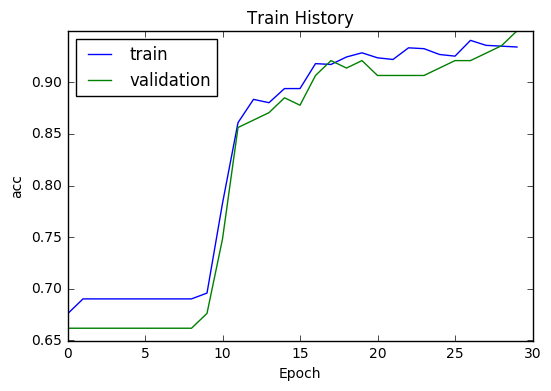

In [45]:
show_train_history(train_history,'acc','val_acc')

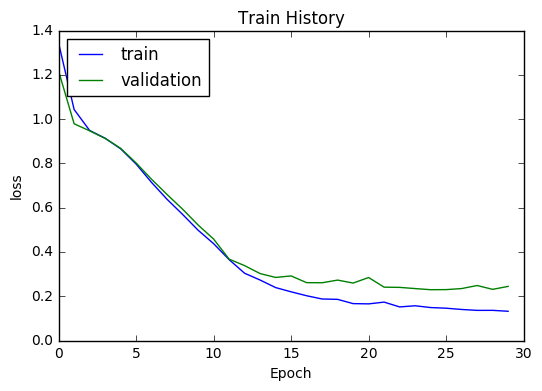

In [46]:
show_train_history(train_history,'loss','val_loss')

In [47]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

346/346 [==============================] - 0s 99us/step


In [48]:
scores[1]

0.921965315851862